<a href="https://colab.research.google.com/github/ehdob-cid20/trabalho-pratico/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#  Pré Processamento

## Importando as bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Importando o *dataset*

### Verifica se o dataset já foi importado para o google drive

Um script que verifica se o dataset já foi importado para o google drive. Caso ainda não tenha sido importado, ele faz o download do arquivo e extrai para a pasta informada na variável **dirName**.

Variáveis:

> **datasetFileName** é o nome do arquivo com extensão.

> **datsetUrl** é o endereço web onde o arquivo está disponível.

> **dirName** é o diretório do google drive onde o dataset será salvo.

Nota: O diretório de salvamento (*dirName*) precisa existir.


In [ ]:
import os

datasetFileName = 'dados-curso-completo.csv.tar.gz'
datsetUrl = 'http://tiagodemelo.info/datasets/dados-curso-completo.csv.tar.gz'
dirName = 'trabalho-pratico' # Este diretorio pode ser alterado se ja tiver o dataset no google drive.

if False == os.path.isfile('/content/drive/My Drive/' + dirName + '/' + datasetFileName[:-7]):
  if False == os.path.isdir('/content/drive'):
    print('Google driver não está montado!')
  elif False == os.path.isdir('/content/drive/My Drive/' +  dirName + '/'):
    print('Diretório ' + dirName + ' não encontrado.')
  elif False == os.path.isfile('/content/drive/My Drive/' + dirName + '/' + datasetFileName):
    !wget -O '/content/drive/My Drive/$dirName/$datasetFileName' '$datsetUrl' #TODO: handle download errors.
    !tar -C '/content/drive/My Drive/$dirName/{datasetFileName[:-7]}' -zxf '/content/drive/My Drive/$dirName/$datasetFileName' #TODO: handle extract errors.
  else:
    !tar -C '/content/drive/My Drive/$dirName/' -zxf '/content/drive/My Drive/$dirName/$datasetFileName' #TODO: handle extract errors.
else:
  print('O dataset ' + datasetFileName[:-7] + ' foi encontrado.')

O dataset dados-curso-completo.csv foi encontrado.


### Importando o *dataset* usando pandas

In [ ]:
dataset = pd.read_csv('/content/drive/My Drive/' + dirName + '/' + datasetFileName[:-7])

## Visualizando o *dataset* inicial (sem qualquer tratamento)



> Segue uma informação geral do dataset tento colunas, contagem e tipo



In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1658825 entries, 0 to 1658824
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   data        1658825 non-null  object 
 1   usuario     1658768 non-null  object 
 2   apelido     1658825 non-null  object 
 3   texto       1658825 non-null  object 
 4   retweet     1658825 non-null  int64  
 5   seguidores  1658825 non-null  int64  
 6   idioma      1658825 non-null  object 
 7   lugar       74605 non-null    object 
 8   pais        74600 non-null    object 
 9   sigla       74595 non-null    object 
 10  latitude    8720 non-null     float64
 11  longitude   8720 non-null     float64
 12  hashtags    1658825 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 164.5+ MB




> Campos nulos do dataset. Em seguida segue uma visão geral de cada campo



In [ ]:
dataset.isnull().sum()

data                0
usuario            57
apelido             0
texto               0
retweet             0
seguidores          0
idioma              0
lugar         1584220
pais          1584225
sigla         1584230
latitude      1650105
longitude     1650105
hashtags            0
dtype: int64

### Sumário para o campo *usuario*

**Resumo geral:**
> Possui 1.658.825 campos, onde 632.601 são únicos, 1.026.167 são duplicados e 57 estão nulos.

> Usuário com maior frequência '.',  aparece 1624.

In [ ]:
dataset.usuario.describe()

count     1658768
unique     632601
top             .
freq         1624
Name: usuario, dtype: object

In [ ]:
usuarios_total = len(dataset.usuario)
usuarios_unicos = dataset.usuario.nunique()
usuarios_null = dataset.usuario.isnull().sum()
usuarios_duplicados = usuarios_total - usuarios_unicos - usuarios_null
usuarios_df = pd.DataFrame({
                  'Usuários': ['únicos', 'duplicados', 'vazio'] ,
                   'Contagem' : [usuarios_unicos, usuarios_duplicados, usuarios_null],
                   'Porcentagem' : [(usuarios_unicos/usuarios_total)*100, (usuarios_duplicados/usuarios_total)*100, (usuarios_null/usuarios_total)*100]})
usuarios_df

,Usuários,Contagem,Porcentagem
0,únicos,632601,38.135487
1,duplicados,1026167,61.861076
2,vazio,57,0.003436


Nota: O campo 'usuario' está trocado com o campo 'apelido', pois usuário é usado como um campo único, enquanto que um apelido pode ser usado por mais de um usuário.

### Sumário para o campo *apelido*

**Resumo geral:**
> Possui 1.658.825 campos, onde 774.516 são únicos e 0 estão nulos.

> Usuário com maior frequência 'Lusa_noticias',  aparece 1404.

In [ ]:
dataset.apelido.describe()

count           1658825
unique           774516
top       Lusa_noticias
freq               1404
Name: apelido, dtype: object

In [ ]:
apelidos_total = len(dataset.apelido)
apelidos_unicos = dataset.apelido.nunique()
apelidos_null = dataset.apelido.isnull().sum()
apelidos_duplicados = apelidos_total - apelidos_unicos - apelidos_null
apelidos_df = pd.DataFrame({
                  'Apelidos': ['únicos', 'duplicados', 'vazio'] ,
                   'Contagem' : [apelidos_unicos, apelidos_duplicados, apelidos_null],
                   'Porcentagem' : [(apelidos_unicos/apelidos_total)*100, (apelidos_duplicados/apelidos_total)*100, (apelidos_null/apelidos_total)*100]})
apelidos_df

,Apelidos,Contagem,Porcentagem
0,únicos,774516,46.690639
1,duplicados,884309,53.309361
2,vazio,0,0.000000


**Número de apelidos por País**

In [ ]:
# Agrupa todos os usuários por pais e conta quantos usuários tem de cada país.
apelido_pais = dataset.groupby("pais", as_index=False)["apelido"].count().sort_values("apelido", ascending=False)

# Calcula a porcentagem de participação
apelido_pais['apelido']= (apelido_pais['apelido']/apelido_pais['apelido'].sum())*100

# Divide o dataset apelido_pais em duas partes. 
# apelido_pais_grandes representa todos os países com pelo menos 0.5% de participação
# apelido_pais_pequenos representa todos os países com menos de 0.5% de participação
apelido_pais_grandes = apelido_pais[apelido_pais.apelido >= 0.5] .sort_values("apelido", ascending=False)
apelido_pais_pequenos = apelido_pais[apelido_pais.apelido < 0.5]

# Calcula a porcentagem de participação total de todos os países com menos de 0.5% de participação
apelidos_total_outros_paises = apelido_pais_pequenos['apelido'].sum()

# Reseta o indice do dataset apelido_pais_grandes para evitar warnings ao adicionar uma nova linha
apelido_pais_grandes = apelido_pais_grandes.reset_index(drop=True)

# Adiciona a nova linha 'Outros Países' ao dataset apelido_pais_grandes
apelido_pais_grandes.loc[len(apelido_pais_grandes.index)] = ['Outros Países',apelidos_total_outros_paises]

# Ordena o dataset apelido_pais_grandes do maior para o menor
apelido_pais_grandes = apelido_pais_grandes.sort_values("apelido", ascending=False).reset_index(drop=True)

# Exibe o dataset apelido_pais_grandes
apelido_pais_grandes = apelido_pais_grandes.rename(columns={"pais" : "Pais", "apelido" : "Porcentagem de presença"})
apelido_pais_grandes

,Pais,Porcentagem de presença
0,Brazil,90.143432
1,Outros Países,3.682306
2,Portugal,3.585791
3,United States,1.431635
4,Italy,0.648794
5,Spain,0.508043


**Gráfico de usuários por país**

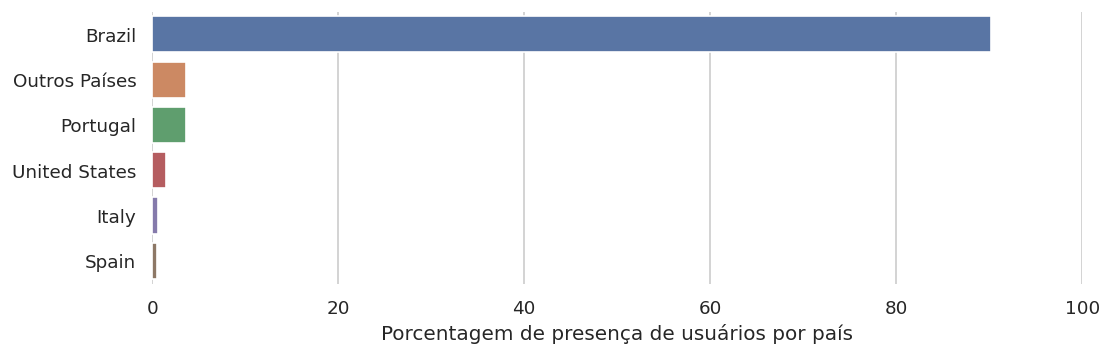

In [ ]:
sns.set(style="whitegrid")
plt.rcParams['figure.dpi'] = 120
f, ax = plt.subplots(figsize=(10, 3))
sns.set_color_codes("pastel")
sns.barplot(x="Porcentagem de presença", y="Pais", data=apelido_pais_grandes)
ax.set(xlim=(0, 100), ylabel="", xlabel="Porcentagem de presença de usuários por país")
sns.despine(left=True, bottom=True)

Nota: A porcentagem de presença de usuários por país se refere ao real número de usuários no campo 'apelido'. A definição de 'usuario' e 'apelido' está trocada no dataset.

### Sumário para o campo *texto*

**Resuno geral:**
> Possui 1658825 campos, onde 1653599 são únicos


> Texto com maior frequência "covid 19? desculpa eu entendi convite para ficar de love", frequência do texto 120.

In [ ]:
dataset.texto.describe()

count                                               1658825
unique                                              1653599
top       covid 19? desculpa eu entendi convite pra fica...
freq                                                    120
Name: texto, dtype: object

**Texto duplicados:**


> Os texto que possuem maior duplicidade são:

*   covid 19? desculpa eu entendi convite para ficar de love
*   e vamos de pandemia
* Temos muitos infectados, mas não é de coronavírus, é maldade e inveja...
* e vamos de isolamento social

In [ ]:
duplicado  = dataset.texto.value_counts().reset_index().rename(columns={'index': 'Texto', 'texto': 'Total'})
duplicado

,Texto,Total
0,covid 19? desculpa eu entendi convite pra fica...,120
1,e vamos de pandemia,82
2,"Tem muitos infectados, mas não é de coronavíru...",70
3,e vamos de isolamento social,63
4,#Podcast - Tudo sobre o #Coronavirus aqui. Ouç...,50
...,...,...
1653594,“Decidi doar metade do meu salário de Vereador...,1
1653595,@OsmarTerra INFECTOLOGISTA DIDIER RAOULT QUE P...,1
1653596,RT @birbteef: BMR 41 https://t.co/SKmb7eaD8e,1
1653597,"Coronavírus\nApós cobranças do SINDSALEM, ALEM...",1


### Sumario para o campo *hashtags*

**Resumo geral:**

> Este campo possui 63838 campos únicos, a informação mais frenquente é o "[ ]"



In [ ]:
dataset.hashtags.describe()

count     1658825
unique      63838
top            []
freq      1495569
Name: hashtags, dtype: object

**Hashtags em destaque:**



> Segue abaixo as 10 hashtags mais usadas:



In [ ]:
dataset.hashtags.value_counts()[:10]

[]                 1495569
['COVID19']           9951
['coronavirus']       6658
['Coronavirus']       3294
['coronavírus']       2890
['Covid_19']          2485
['covid19']           2403
['Covid19']           2367
['Coronavírus']       1566
['Repost']             831
Name: hashtags, dtype: int64



> Uma apresentação das hashtags mais frequentes acima e menos frequentes abaixo.



In [ ]:
dataset.hashtags.value_counts()

[]                                                   1495569
['COVID19']                                             9951
['coronavirus']                                         6658
['Coronavirus']                                         3294
['coronavírus']                                         2890
                                                      ...   
['covid19', 'fozdoIguaçu']                                 1
['mininaked', 'naked', 'present']                          1
['ColunadoMafuz', 'clubes', 'jogadores']                   1
['HCNoticias', 'esporte', 'suspenso', 'pandemia']          1
['CoronaDiario']                                           1
Name: hashtags, Length: 63838, dtype: int64

### Sumario para o campo *idioma*

**Resumo geral:**



> No campo idioma temos 59 registros únicos, onde o maior frequente é "pt" com 1586796



In [ ]:
dataset.idioma.describe()

count     1658825
unique         59
top            pt
freq      1586796
Name: idioma, dtype: object



> Contagem de registro por pais



In [ ]:
dataset.idioma.value_counts()

pt     1586796
en       23991
es       14255
it        6480
und       5656
ar        4579
fr        3656
ca        2600
tr        2296
ja        1955
in         948
th         890
tl         604
ko         544
hi         485
ru         417
de         361
pl         262
fa         258
nl         208
ur         179
ht         167
et         162
eu         116
el          94
lt          86
sv          84
cs          72
no          56
zh          51
da          45
ro          45
fi          44
cy          39
uk          37
lv          36
iw          36
ta          32
hu          26
vi          23
is          21
sr          20
sl          18
te          17
sd          12
ne          11
bn          10
mr          10
gu           7
ps           6
ckb          5
bg           4
am           4
or           2
si           2
ml           2
dv           1
kn           1
my           1
Name: idioma, dtype: int64



> Contagem de usuarios por pais



In [ ]:
dataset.groupby('idioma').usuario.count()

idioma
am           4
ar        4578
bg           4
bn          10
ca        2600
ckb          5
cs          72
cy          39
da          45
de         361
dv           1
el          94
en       23991
es       14255
et         162
eu         116
fa         258
fi          44
fr        3655
gu           7
hi         485
ht         167
hu          26
in         948
is          21
it        6480
iw          36
ja        1955
kn           1
ko         544
lt          86
lv          36
ml           2
mr          10
my           1
ne          11
nl         208
no          56
or           2
pl         262
ps           6
pt     1586743
ro          45
ru         417
sd          12
si           2
sl          18
sr          20
sv          84
ta          32
te          17
th         889
tl         604
tr        2296
uk          37
und       5655
ur         179
vi          23
zh          51
Name: usuario, dtype: int64

### Sumario para o campo retweet


> Média de retweets por idioma



In [ ]:
retweet_idioma = dataset.groupby('idioma').retweet.mean()

retweet_idioma.sort_values(ascending=False)

idioma
ko     71714.169118
th     11485.112360
en      8583.975574
und     2974.349364
in      2073.594937
ja      2048.657289
fr      1897.999726
da      1181.511111
cy       973.871795
es       853.611926
zh       754.588235
fi       620.909091
hi       589.490722
et       561.043210
tr       533.895035
te       496.117647
ro       393.066667
ar       367.008080
ht       306.419162
cs       275.305556
tl       259.064570
ur       253.055866
sd       239.166667
ta       214.750000
dv       205.000000
hu       199.307692
de       183.986150
lt       164.872093
uk       145.054054
sl       140.833333
vi       118.956522
eu       117.465517
my       108.000000
or       106.500000
fa        82.992248
pl        79.530534
sr        74.950000
kn        62.000000
ru        56.093525
el        46.882979
nl        43.788462
mr        43.000000
bn        30.500000
it        27.114969
gu        19.428571
ca        18.160769
pt        16.993245
ne        13.363636
sv        10.940476
ps         9.



> Somatoria de retweets por texto



In [ ]:
retweet_texto = dataset.groupby('texto').retweet.sum()

retweet_texto.sort_values(ascending=False)

texto
RT @BTS_twt: 하루종일 쉬는중!\n우리 아미들도 쉬는날엔 하루종일 쉽시다\n#BOTD #BTS_OF_THE_DAY https://t.co/1ImqLijZHa                                                     3630493
RT @OfficialMLK3: As my father explained during his lifetime, a riot is the language of the unheard.                                             3334793
RT @andymilonakis: Congratulations to the Astronauts that left Earth today. Good choice                                                          3219652
RT @BTS_twt: D-2 #AgustD https://t.co/2BPGGs8KbN                                                                                                 3072179
RT @OfficialMLK3: No justice, no peace. No justice, no peace. No justice, no peace.                                                              2878644
                                                                                                                                                  ...   
Isso é bobagem! A questão não é o Bozo, e sim tratar um continente chamado B



> Somatorio de retweets por pais



In [ ]:
retweet_pais = dataset.groupby('pais').retweet.sum()

retweet_pais.sort_values(ascending=False)

pais
Brazil           218346
Portugal          11874
United States      4501
France             2534
Italy               669
                  ...  
Lithuania             0
Luxembourg            0
Macau                 0
Malaysia              0
Andorra               0
Name: retweet, Length: 121, dtype: int64



> Usuários com maiores retweets



In [ ]:
retweet_usuario = dataset.groupby('usuario').retweet.max()

retweet_usuario.sort_values(ascending=False)

usuario
Maryy                         1139763
My cabbages!!                  989485
Tr1gger Mike                   901093
tweets not loading             850226
Lyndsay⁷                       842837
                               ...   
Thiago Vasconcelos                  0
Thiago Vasconcelos Pereira          0
Thiago Ventura 🇧🇷 🚘                 0
Thiago Viana Carraro                0
 ESTSOCCIENCIA                      0
Name: retweet, Length: 632601, dtype: int64



> Hashtags com maiores quantidade de retweets



In [ ]:
retweent_hashtags = dataset.groupby('hashtags').retweet.sum()

retweent_hashtags.sort_values(ascending=False)

hashtags
[]                                                                              287100210
['BOTD', 'BTS_OF_THE_DAY']                                                        8416915
['AgustD']                                                                        3072179
['0613FM_0515']                                                                   2664793
['JIMIN']                                                                         2504973
                                                                                  ...    
['bordercollie', 'covid_19', 'pastoreio', 'herdingdog']                                 0
['boraviajar', 'ferias', 'virus', 'Coronavirus', 'saude']                               0
['boratrabalhar']                                                                       0
['boratrabalhar', 'ficaemcasa', 'ficaemcasaporra', 'covid_19', 'quarentena']            0
['007SemTempoParaMorrer', 'Coronavirus']                                                0
N

## Aplicando tratamento ao *dataset*

### Removendo duplicatas

### Categorizando variáveis

## Dividindo o dataset em *Training set* e *Test set*